In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tqdm import tqdm_notebook as tqdm
from copy import copy, deepcopy
from tensorflow.keras import datasets, layers, models
from skimage import color

from utils import *

In [2]:
load_data = tfds.load("cifar10")
train, test = load_data["train"], load_data["test"]

In [3]:
list_images = [data["image"] for data in train.shuffle(20000).take(4 * 6)]

In [4]:
#data = [data for data in train.shuffle(1000).take(1)][0]
new_feature, new_label = pre_process(list_images)

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


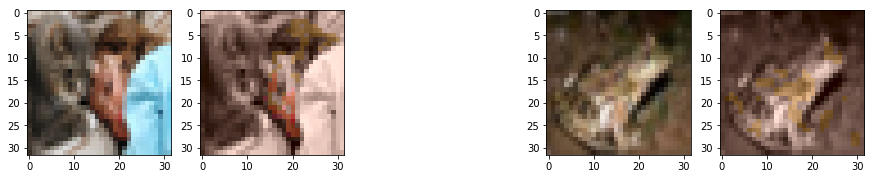

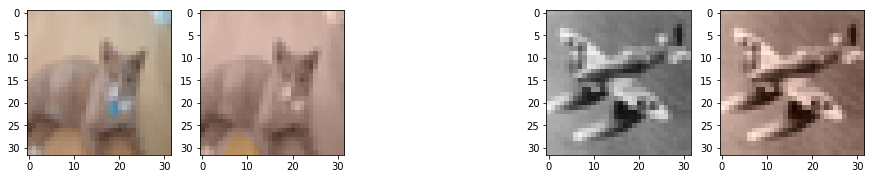

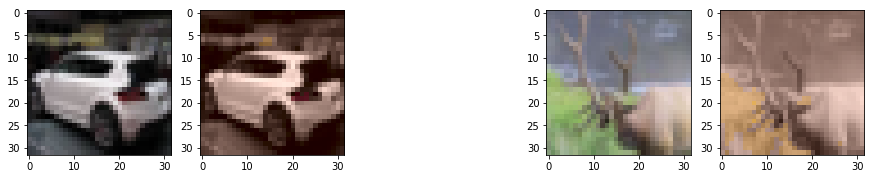

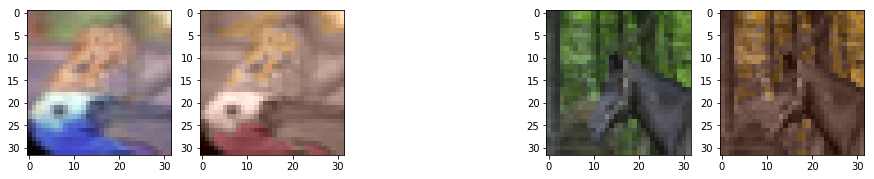

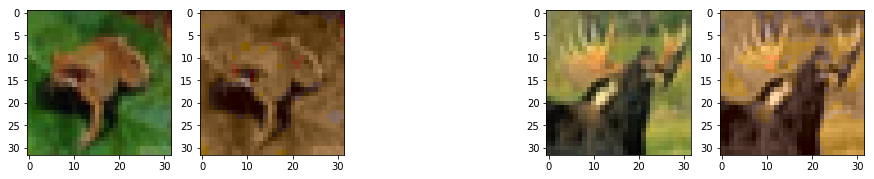

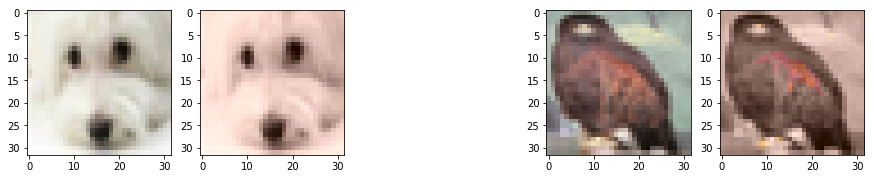

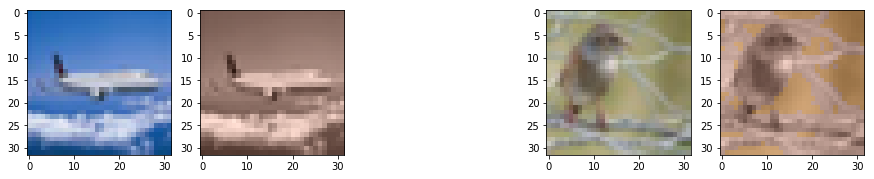

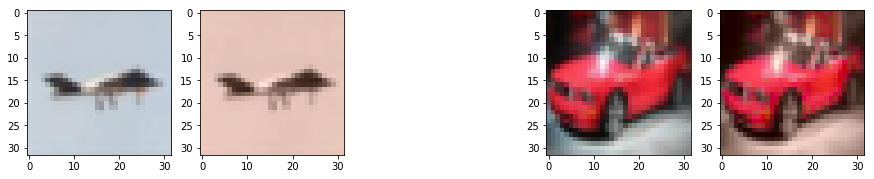

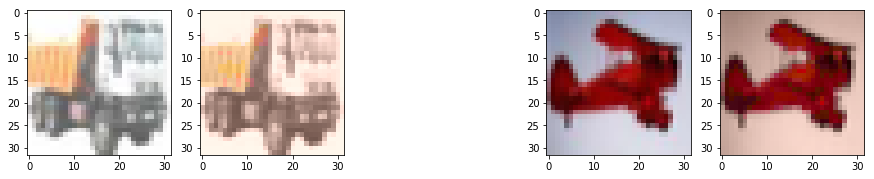

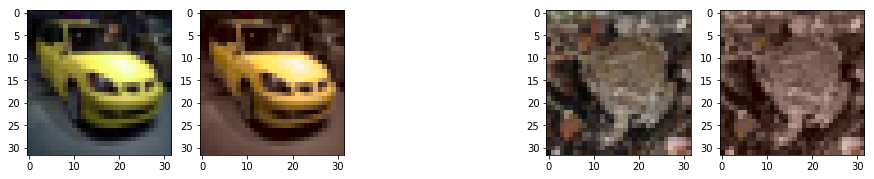

In [11]:
for index, data in enumerate(train.shuffle(1000).take(20)):
    if index % 2 == 0:
        plt.figure(figsize=(15, 5))
        base_index = 1
    else:
        base_index = 4
        
    plt.subplot(1, 5, base_index)
    plt.imshow(data["image"])

    new_feature, new_label = pre_process(data["image"])
    reconstructed_image = process_output(new_feature, new_label, tuple(data["image"].shape)[:2])
    plt.subplot(1, 5, base_index + 1)
    plt.imshow(reconstructed_image)

In [ ]:
#####################################
#####################################
#####################################

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)